In [ ]:
import pandas
data = pandas.read_csv('/content/StudentStatistics.csv',sep=';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [ ]:
data.columns

Index(['RespNr', 'Location', 'OAA_ObjCourse', 'OAA_ObjClass', 'OAA_CourseExec',
       'OAA_RelActObj', 'OAA_RelActExa', 'OAA_RelObjExa', 'OAA_LearProcAct',
       'OAA_LearProcPrep', 'OAA_LearProcDisc', 'OAA_LearProcLect',
       'OAA_LearProcExe', 'OAA_SetupMotiv', 'OAA_UsefulnessStat', 'Mat_Burns',
       'Mat_Baarda', 'Mat_Laerd', 'Mat_PowerPoint', 'Mat_AddMaterial',
       'Mat_Excel', 'Mat_Announcements', 'BB_Own', 'BB_Motivating',
       'BB_UserFr', 'BB_SuffICT', 'Teach_Motivate', 'Teach_LinkTheory',
       'Teach_StimAsk', 'Teach_Avail', 'Teach_StimDisc', 'Teach_Partic',
       'Teach_Comp', 'Mix_Adeq1', 'Mix_Adeq1_Open', 'Mix_NrClass', 'Mix_NrAct',
       'Mix_Adeq2', 'Mix_Adeq2_Open', 'Mix_IntClass', 'Mix_IntDiscus',
       'Mix_IntPrep', 'Mix_IntExcel', 'Over_Grade', 'Gen_Gender', 'Gen_Age',
       'Gen_SecSchool', 'Gen_Classes', 'Gen_NumberSubj', 'Gen_Time'],
      dtype='object')

In [ ]:
data['Gen_Gender'].value_counts()

,count
Gen_Gender,
Male,34
Female,12


In [ ]:
data['Gen_SecSchool'].value_counts()

,count
Gen_SecSchool,
The Netherlands,24
Asia,7
Africa,5
Othern Western Europe,3
South America,1
North America,1
Eastern Europe,1


In [ ]:
data['Gen_SecSchool'][data['Gen_SecSchool']!='The Netherlands'] = 'Others'

In [ ]:
data['Gen_SecSchool'].value_counts()

,count
Gen_SecSchool,
Others,31
The Netherlands,24


In [ ]:
mycrosstab = pandas.crosstab(data['Gen_Gender'], data['Gen_SecSchool'])

In [ ]:
mycrosstab

Gen_SecSchool,Others,The Netherlands
Gen_Gender,,
Female,4,8
Male,18,16


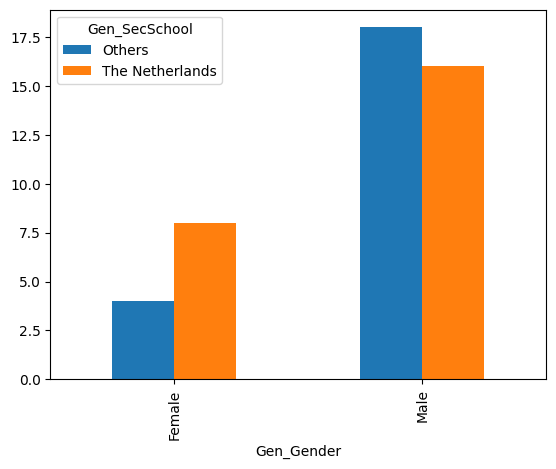

In [ ]:
import matplotlib.pyplot as plt
mycrosstab.plot(kind='bar')
plt.show()

In [ ]:
# Fisher exact test

# H0 - no influence on gender on secondary school location
# Ha - influence on gender on secondary school

from scipy.stats import fisher_exact
fisher_exact(mycrosstab)

SignificanceResult(statistic=0.4444444444444444, pvalue=0.32137504230527486)

In [ ]:
#pvalue=0.32137504230527486

# No evidence to reject null hypothesis

In [ ]:
#Odds ratio
a = mycrosstab.iloc[0,0]
b = mycrosstab.iloc[0,1]
c = mycrosstab.iloc[1,0]
d = mycrosstab.iloc[1,1]
print(OR)
OR = (a/c)/(b/d)

if OR <1.49:
  print('negligible')
elif OR < 3.45:
  print('small')
elif OR < 9:
  print('medium')
else:
  print('large')

0.4444444444444444
negligible


Fisher exact test did not find any influence of gender on the location of secondary school (pvalue = 0.32) and further the Odds ratio effect size was negligible(OR =0.44)